# 仓位管理方案测试
## 假设每次交易的收益是一个符合正态分布的随机变量


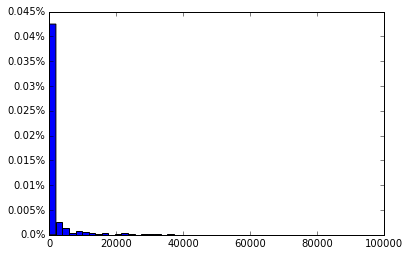

In [66]:
%matplotlib inline
import matplotlib
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def basic_policy(cost):
    percent = randn() * 3
    if percent > 10.0:
        percent = 10.0
    if percent < -10.0:
        percent = -10.0
    return (percent, cost * (1 + percent/100.0))

def display_hist(values):
    def to_percent(y, position):
        # Ignore the passed in position. This has the effect of scaling the default
        # tick locations.
        s = str(100 * y)

        # The percent symbol needs escaping in latex
        if matplotlib.rcParams['text.usetex'] is True:
            return s + r'$\%$'
        else:
            return s + '%'

    # Make a normed histogram. It'll be multiplied by 100 later.
    plt.hist(values, bins=50, normed=True)

    # Create the formatter using the function to_percent. This multiplies all the
    # default labels by 100, making them all percentages
    formatter = FuncFormatter(to_percent)

    # Set the formatter
    plt.gca().yaxis.set_major_formatter(formatter)

    plt.show()


# 测试1，永远满仓的方案
percents = []
assets = []
m=0
while m < 1000:
    n=0
    asset=10000.0
    while n < 10000:
        (percent, asset) = basic_policy(asset)
        percents.append(percent)
        n+=1
    if asset < full * 10:
        assets.append(asset)
    m+=1
#display_hist(percents)
display_hist(assets)

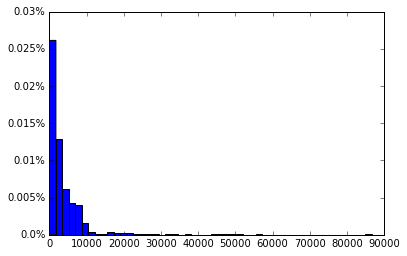

In [67]:
# 测试2，高于成本时满仓，低于成本时半仓
full = 10000.0
percents = []
assets = []
m=0
while m < 1000:
    n=0
    asset=full
    while n < 10000:
        if asset >= full:
            position = asset
        else:
            position = asset * 0.5
        asset -= position
        (percent, position) = basic_policy(position)
        asset += position 
        percents.append(percent)
        n+=1
    if asset < full * 10:
        assets.append(asset)
    m+=1
#display_hist(percents)
display_hist(assets)

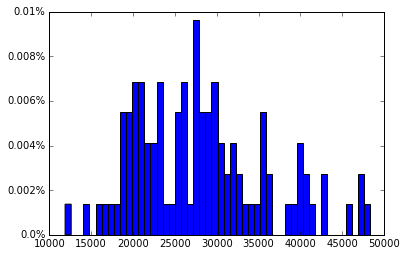

In [97]:
# 测试3，带止损的策略，固定止损-5%
def stop_policy(cost, stop):
    percent = randn() * 3 + 1
    if percent > 10.0:
        percent = 10.0
    elif percent < stop:
        percent = stop
    elif percent < -10.0:
        percent = -10.0
    return (percent, cost * (1 + percent/100.0))

full = 10000.0
percents = []
assets = []
m=0
while m < 100:
    n=0
    asset=full
    while n < 100:
        position = asset
        asset -= position
        (percent, position) = stop_policy(position, -5.0)
        asset += position
        percents.append(percent)
        n+=1
    if asset < full * 10000:
        assets.append(asset)
    m+=1
#display_hist(percents)
display_hist(assets)

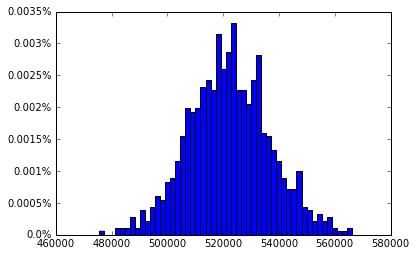

In [98]:
# 测试4，带止损的策略，固定止损-5%,在亏损至初始的一半前，始终维持初始的半仓操作

full = 10000.0
percents = []
assets = []
m=0
while m < 1000:
    n=0
    asset=full
    while n < 10000:
        if asset > full * 0.5:
            position = full * 0.5
        else:
            position = asset
        asset -= position
        (percent, position) = stop_policy(position, -5.0)
        asset += position 
        percents.append(percent)
        n+=1
    assets.append(asset)
    m+=1
#display_hist(percents)
display_hist(assets)

/usr/local/lib/python3.4/site-packages/matplotlib/axes/_axes.py:6001: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


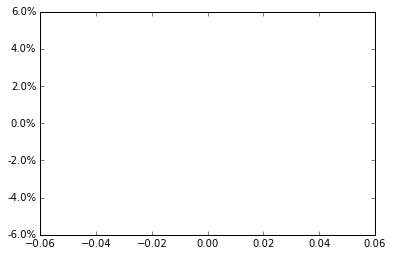

In [99]:
# 测试5，带止损的策略，固定止损-5%, 亏损时仓位 * 0.5, 

full = 10000.0
percents = []
assets = []
m=0
while m < 1000:
    n=0
    asset=full
    while n < 10000:
        if asset > full * 0.5:
            position = full * 0.5
        else:
            position = asset
        asset -= position
        (percent, position) = stop_policy(position, -5.0)
        asset += position 
        percents.append(percent)
        n+=1
    if asset < full * 10:
        assets.append(asset)
    m+=1
#display_hist(percents)
display_hist(assets)